# Image Classification Using Scikit-learn

### Problem Statement

* You are a data-scientist of a global company. As a data-scientist you have to build an image classification model to classify 2 categories of images namely cat and dogs.


### Importing the Libraries

In [37]:
import numpy as np
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image

### Loading the Image data

In [38]:
input_dir = "Datasets/Cat_Dog_Image"

### Displaying the Image

In [39]:
# To display an image we need a path of each image. Here we are using two functions to handle path .
# os.listdir - print a list of names of all the files present in the specified path.
# os.path.join - return a combined path by merging arguments.

categories = ["Cat500", "Dog500"]
for category in categories:
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file).replace("\\", "/")
        print(img_path)

Datasets/Cat_Dog_Image/Cat500/cat_1.jpg
Datasets/Cat_Dog_Image/Cat500/cat_10.jpg
Datasets/Cat_Dog_Image/Cat500/cat_100.jpg
Datasets/Cat_Dog_Image/Cat500/cat_101.jpg
Datasets/Cat_Dog_Image/Cat500/cat_102.jpg
Datasets/Cat_Dog_Image/Cat500/cat_103.jpg
Datasets/Cat_Dog_Image/Cat500/cat_104.jpg
Datasets/Cat_Dog_Image/Cat500/cat_106.jpg
Datasets/Cat_Dog_Image/Cat500/cat_109.jpg
Datasets/Cat_Dog_Image/Cat500/cat_11.jpg
Datasets/Cat_Dog_Image/Cat500/cat_111.jpg
Datasets/Cat_Dog_Image/Cat500/cat_113.jpg
Datasets/Cat_Dog_Image/Cat500/cat_114.jpg
Datasets/Cat_Dog_Image/Cat500/cat_116.jpg
Datasets/Cat_Dog_Image/Cat500/cat_118.jpg
Datasets/Cat_Dog_Image/Cat500/cat_119.jpg
Datasets/Cat_Dog_Image/Cat500/cat_12.jpg
Datasets/Cat_Dog_Image/Cat500/cat_120.jpg
Datasets/Cat_Dog_Image/Cat500/cat_123.jpg
Datasets/Cat_Dog_Image/Cat500/cat_124.jpg
Datasets/Cat_Dog_Image/Cat500/cat_129.jpg
Datasets/Cat_Dog_Image/Cat500/cat_13.jpg
Datasets/Cat_Dog_Image/Cat500/cat_132.jpg
Datasets/Cat_Dog_Image/Cat500/cat_133.jp

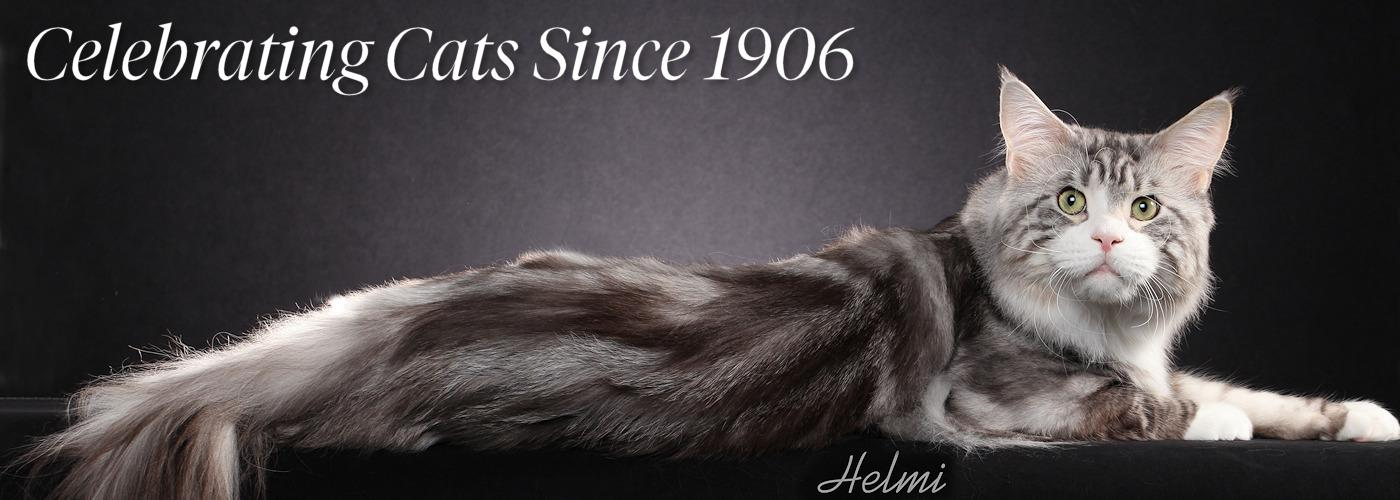

In [40]:
# Taking any random path of the previous output to display the image.

Image.open("Datasets/Cat_Dog_Image/Cat500/cat_129.jpg")

### Image conversion to array

In [41]:
img = imread(img_path)

In [42]:
# Resizing and flattening the numpy array.

img = resize(img, (15,15)).flatten()

In [ ]:
# Converting all the images into a 1-D array and storing it into data variable. 
# Here Label contains two categories i.e 0 (Ca  t) and 1 (Dog)
from skimage.color import rgb2gray

data, labels = [], []

for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        
        if not file.lower().endswith((".jpg", ".png", ".jpeg")):
            print(f"Skipping non-image file: {file}")
            continue
        
        img_path = os.path.join(input_dir, category, file).replace("\\", "/")
        
        try:
            img_arr = imread(img_path)

            # Handle RGBA or RGB images by converting to grayscale (ensure a consistent shape)
            if img_arr.ndim == 3:
                img_arr = rgb2gray(img_arr)

             # Resize to 15x15
            img_arr = resize(img_arr, (15, 15), anti_aliasing=True).flatten()
            
            if img_arr.shape != (15 * 15,):
                print(f"Unexpected shape at: {img_path}, shape: {img_arr.shape}")
                continue
            
            data.append(img_arr)
            labels.append(category_idx)

        except Exception as e:
            print(f"Error processing file {img_path}: {e}")
    
    print(category_idx, category)

0 Cat500
1 Dog500


In [44]:
labels = np.asarray(labels)
data = np.asarray(data)

# Implementing ML Algorithms

### Data PreProcessing

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

c:\Users\Bhautik Gondaliaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test)*100

100.0

### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)
y_pred = dtc_model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test)*100

100.0

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=1000)
rfc_model.fit(x_train, y_train)
y_pred = rfc_model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test)*100

100.0

# Hyperparameter Tuning - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4,5,6,7,8],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

# Print the best parameters
print("Best Parameters:", CV_rfc.best_params_)

# Train the best model
rfc1 = RandomForestClassifier(random_state=42, 
                              max_features=CV_rfc.best_params_['max_features'],
                              n_estimators=CV_rfc.best_params_['n_estimators'],
                              max_depth=CV_rfc.best_params_['max_depth'],
                              criterion=CV_rfc.best_params_['criterion'])
rfc1.fit(x_train, y_train)
y_pred = rfc1.predict(x_test)
print("Accuracy for Random Forest on data: ", accuracy_score(y_test, y_pred)*100)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
Accuracy for Random Forest on data:  0.5714285714285714


In [59]:
import pandas as pd

pd.DataFrame({"Actual_Value":y_test, "Predicted_Value":y_pred})

,Actual_Value,Predicted_Value
0,0,1
1,1,1
2,1,1
3,0,1
4,0,1
...,...,...
135,0,0
136,0,1
137,1,1
138,0,1
